# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2383 Жданов Антон Константинович и Ильин Павел Олегович. Вариант №13.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

1. Дискретизация непрерывного сигнала


Пусть задан непрерывный сигнал\
$
x(t)= \sum_{k=1}^{M} A_k \cos(\omega_k t + \varphi_k).
$

Дискретизация с шагом времени (T) приводит к получению дискретной
последовательности:

$
x[n] = x(nT) = \sum_{k=1}^{M} A_k \cos(\omega_k nT + \varphi_k).
$

При (T = 1): $
x[n] = \sum_{k=1}^{M} A_k \cos(\omega_k n + \varphi_k).
$

## 2. Дискретное преобразование Фурье (ДПФ)

ДПФ вычисляется по формуле: $
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2\pi kn / N}.
$

Амплитудный спектр: $
|X[k]|.
$

## 3. Полиномиальное сглаживание

Сглаживание выполняется путём аппроксимации фрагмента сигнала полиномом некоторой степени.

* Сглаживание полиномом 2-ой степени по 5 точкам:
Коэффициенты можно взять из таблиц для сглаживающих фильтров Савицкого-Гола.
Для 5 точек и полинома 2-ой степени:
$y[n] = (-3*x[n-2] + 12*x[n-1] + 17*x[n] + 12*x[n+1] - 3*x[n+2]) / 35$
$H(ω) = (17 + 24*cos(ω) - 6*cos(2ω)) / 35$

* Сглаживание полиномом 2-ой степени по 9 точкам:
Коэффициенты:
$y[n] = (-21*x[n-4] + 14*x[n-3] + 39*x[n-2] + 54*x[n-1] + 59*x[n] + 54*x[n+1] + 39*x[n+2] + 14*x[n+3] - 21*x[n+4]) / 231$
$H(ω) = (59 + 108*cos(ω) + 78*cos(2ω) + 28*cos(3ω) - 42*cos(4ω)) / 231$

* Сглаживание полиномом 4-ой степени по 7 точкам:
Коэффициенты:
$y[n] = (5*x[n-3] - 30*x[n-2] + 75*x[n-1] + 131*x[n] + 75*x[n+1] - 30*x[n+2] + 5*x[n+3]) / 231$
$H(ω) = (131 + 150*cos(ω) - 60*cos(2ω) + 10*cos(3ω)) / 231$

* Сглаживание полиномом 4-ой степени по 11 точкам:
Коэффициенты:
$y[n] = (-36*x[n-5] + 9*x[n-4] + 44*x[n-3] + 69*x[n-2] + 84*x[n-1] + 89*x[n] + 84*x[n+1] + 69*x[n+2] + 44*x[n+3] + 9*x[n+4] - 36*x[n+5]) / 429$
$H(ω) = (89 + 168*cos(ω) + 138*cos(2ω) + 88*cos(3ω) + 18*cos(4ω) - 72*cos(5ω)) / 429$

## 4. Передаточная функция FIR-фильтра

Полиномиальный фильтр является FIR-фильтром: $
y[n] = \sum_{k=-K}^{K} h[k] x[n-k].
$

Частотная характеристика: $
H(\omega) = \sum_{k=-K}^{K} h[k] e^{-j \omega k}.
$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$,изменяющимися с шагом $Δ\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(42)

In [ ]:
T = 1
n = 11
N = 32
dw = np.pi * 0.1
A = np.array(random.sample(range(1, 12), 11))
A_norm = A / sum(A)
w = np.arange(0, np.pi + 1e-12, dw)

phi = np.array([random.uniform(0.0, 0.5) for _ in range(n)], dtype=float)

def gen_signal(k):
  return np.sum([A_norm[i] * np.cos(w[i] * k + phi[i]) for i in range(n)])

x_analog = np.arange(0, N, 0.001)
Y_analog = [gen_signal(i) for i in x_analog]

x_discrete = np.arange(N)
Y_discrete = [gen_signal(i) for i in x_discrete]

## Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

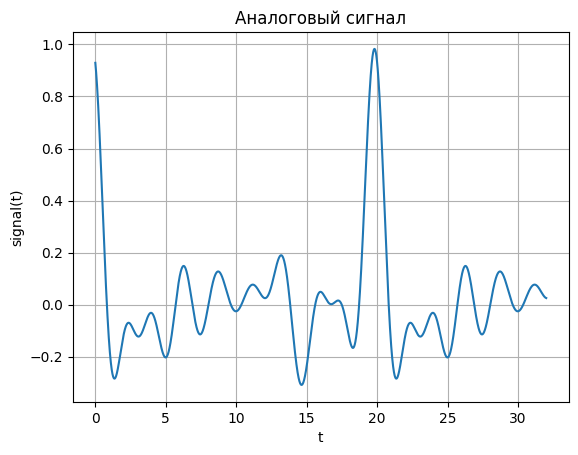

In [ ]:
plt.plot(x_analog, Y_analog)
plt.title('Аналоговый сигнал')
plt.xlabel('t')
plt.ylabel('signal(t)')
plt.grid()
plt.show()

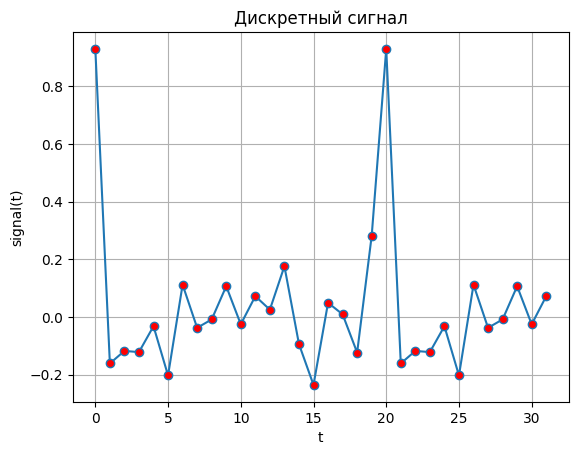

In [ ]:
plt.plot(x_discrete, Y_discrete, marker='o', markerfacecolor='red')
plt.title("Дискретный сигнал")
plt.xlabel('t')
plt.ylabel('signal(t)')
plt.grid()
plt.show()

## Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

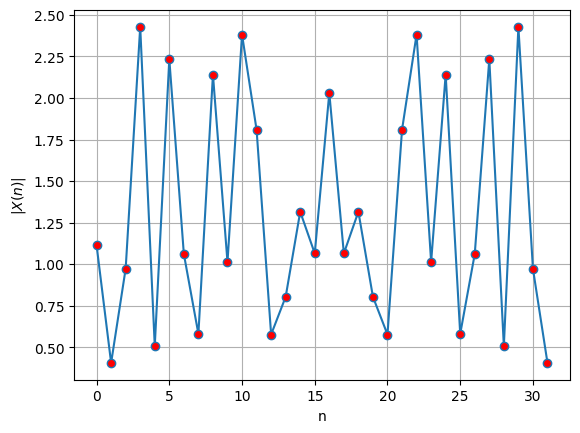

In [ ]:
def DFT(x):
    """
    Ручная реализация ДПФ:
        X[k] = sum_{n=0}^{N-1} x[n] * exp(-j 2π k n / N), k=0..N-1
    Возвращает массив комплексных значений X.
    """
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        n = np.arange(N)
        exponent = -2j * np.pi * k * n / N
        X[k] = np.sum(x * np.exp(exponent))
    return X

plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), marker='o', markerfacecolor='red')
plt.xlabel('n')
plt.ylabel('$|X(n)|$')
plt.grid()
plt.show()

## Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [ ]:
def smooth5(x):
    x = np.asarray(x, dtype=float)
    kernel = np.ones(5, dtype=float) / 5.0
    y = np.convolve(x, kernel, mode='same')
    return y

def smooth9(x):
    """
    Сглаживание по 9 точкам с нулевым дополнением (деление всегда на 9).
    Аналог исходной функции для 5 точек.
    """
    x = np.asarray(x, dtype=float)
    kernel = np.ones(9, dtype=float) / 9.0
    y = np.convolve(x, kernel, mode='same')
    return y

## Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

[]

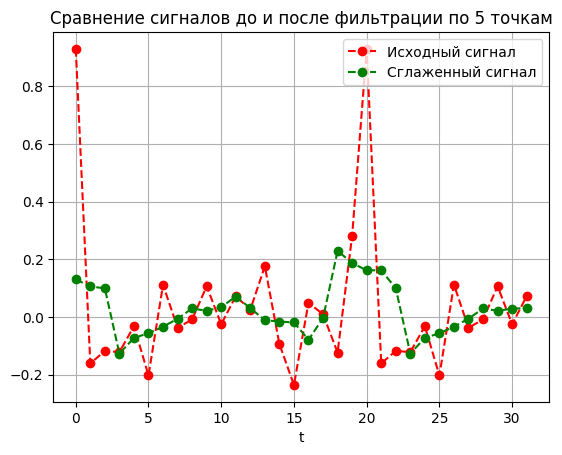

In [ ]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth5(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 5 точкам')
plt.xlabel('t')
plt.plot()

[]

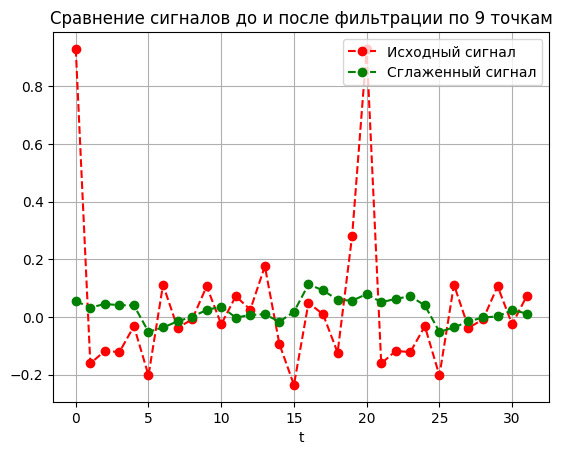

In [ ]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth9(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 9 точкам')
plt.xlabel('t')
plt.plot()

## Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

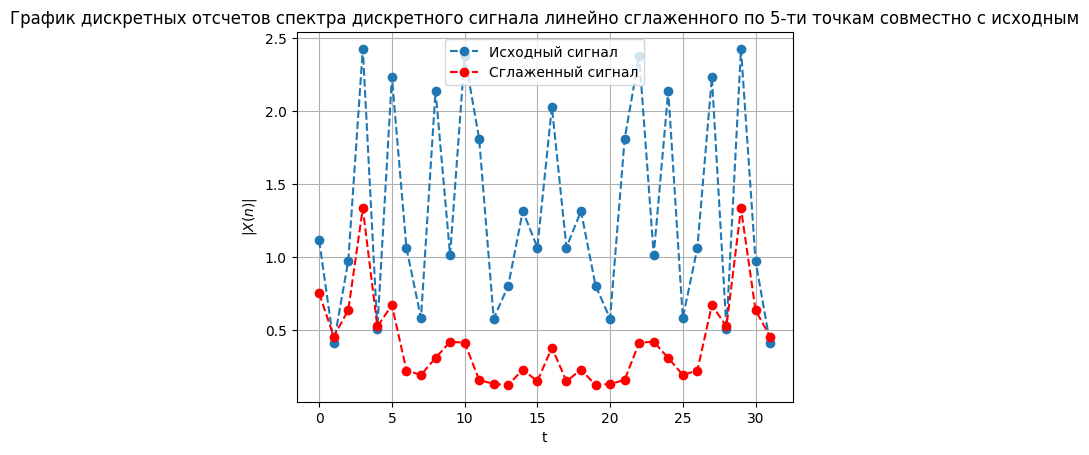

In [ ]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth5(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 5-ти точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

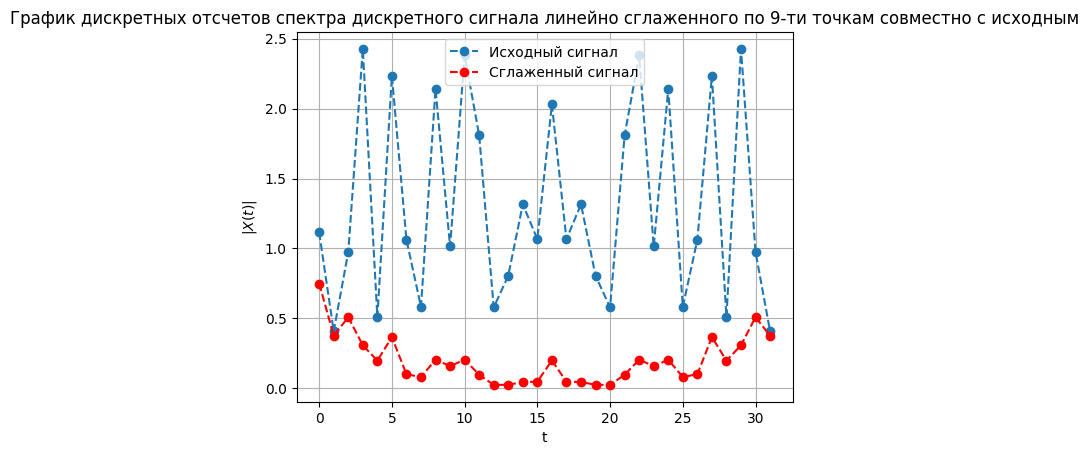

In [ ]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth9(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 9-ти точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

## Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Спектр после индекса 16 дублирует первую половину (симметрия модуля ДПФ для вещественной последовательности), поэтому анализ ограничивается первой половиной.
Применение 5‑точечного фильтра оставляет низкочастотную энергию почти неизменной, но заметно снижает амплитуды остальных гармоник: пики становятся ниже, однако структура ещё частично повторяет исходную.
9‑точечное усреднение действует более жёстко: практически все средние и высокочастотные компоненты подавлены, форма спектра сглаженного сигнала сильно отличается от исходной.
Поведение согласуется с формулой передаточной функции скользящего среднего: увеличение длины окна уменьшает ширину главного лепестка и усиливает подавление за его пределами — отсюда более сильное сглаживание при L=9.

## Задание 8(а)
Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

### Задание 4.

In [ ]:
W5 = np.array([-3, 12, 17, 12, -3], dtype=float) / 35.0
W9 = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21], dtype=float) / 231.0

def smooth5_poly2(x):
    x = np.asarray(x, dtype=float)
    return np.convolve(x, W5, mode='same')

def smooth9_poly2(x):
    x = np.asarray(x, dtype=float)
    return np.convolve(x, W9, mode='same')

### Задание 5

[]

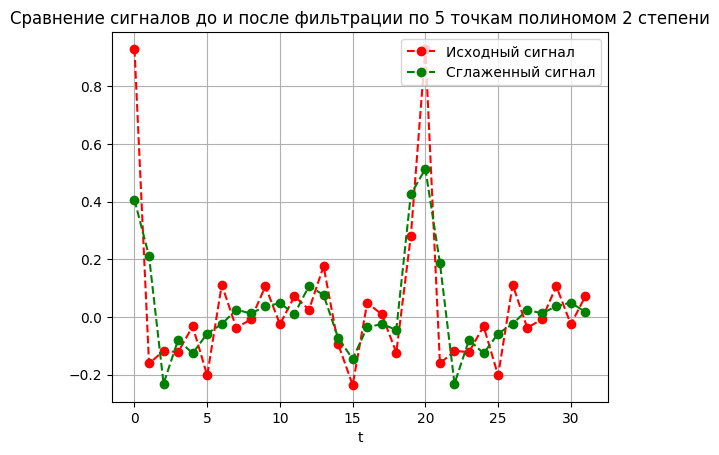

In [ ]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth5_poly2(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 5 точкам полиномом 2 степени')
plt.xlabel('t')
plt.plot()

[]

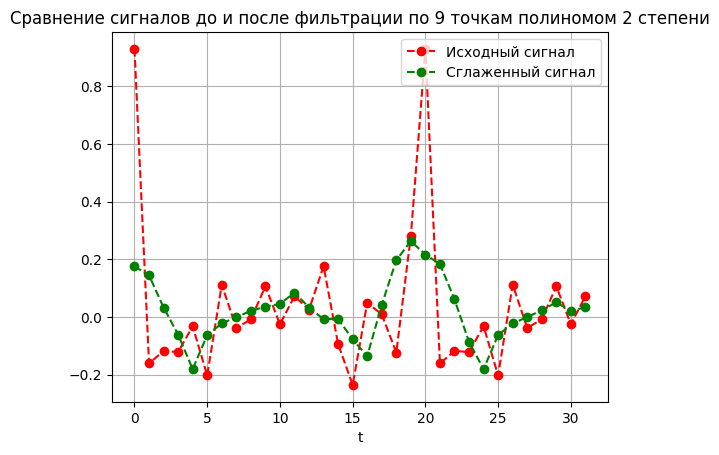

In [ ]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth9_poly2(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 9 точкам полиномом 2 степени')
plt.xlabel('t')
plt.plot()

### Задание 6

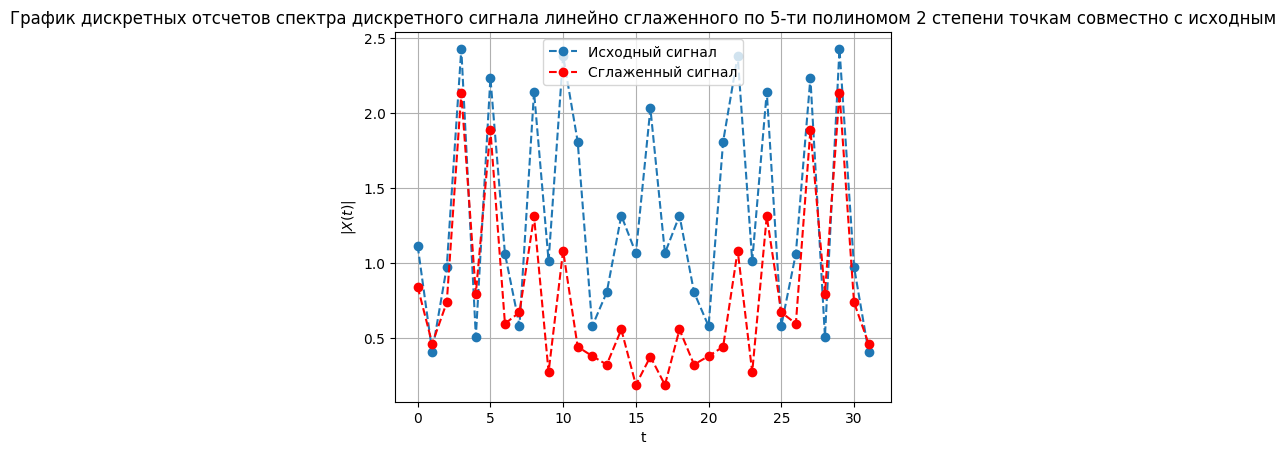

In [ ]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth5_poly2(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 5-ти полиномом 2 степени точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

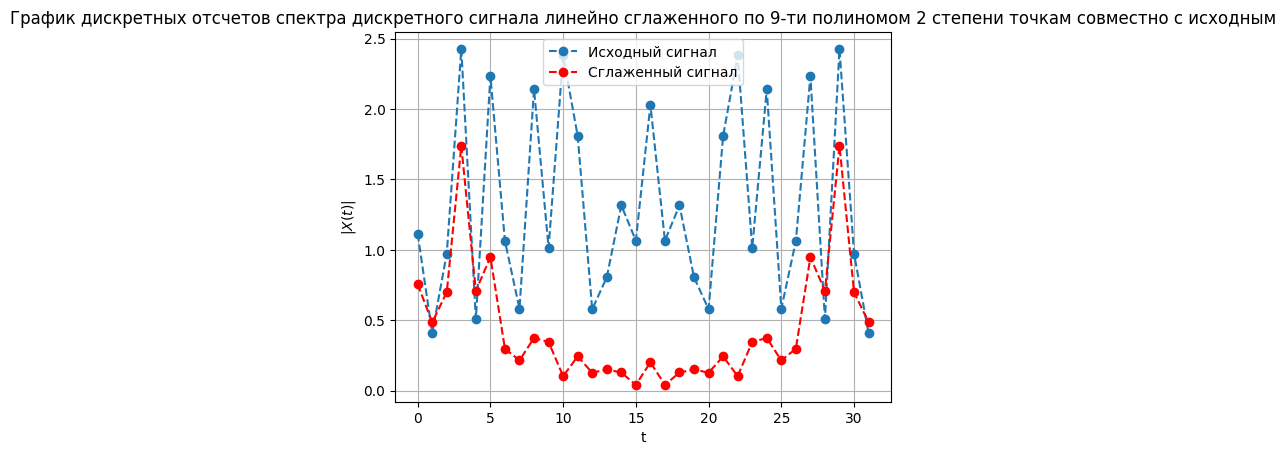

In [ ]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth9_poly2(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 9-ти полиномом 2 степени точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

### Задание 7

Амплитудный спектр вещественного сигнала длины 32 проявляет зеркальную симметрию относительно отсчёта k = 16, поэтому для дальнейшего анализа достаточно рассматривать диапазон k = 0…16. Сглаживание полиномом второй степени (окно Савицкого–Голея) пропускает более широкий диапазон низких частот, чем простое линейное (равновесовое) усреднение: начальные низкочастотные компоненты практически не искажаются. При увеличении длины окна полоса пропускания сужается. Окно из 5 точек ещё сохраняет форму исходного спектра на центральных частотах, тогда как в зоне более высоких индексов (примерно k=10…16) амплитуды уже заметно занижены. При использовании окна из 9 точек подавление средних и высокочастотных составляющих становится выраженным: амплитуды во второй половине первой полуоси резко уменьшаются. Наблюдаемое поведение согласуется с теоретической частотной характеристикой фильтра (формой |H(ω)| для соответствующих коэффициентов).

## Задание 8(б)


### Задание 4

In [ ]:
W7  = np.array([  5, -30,  75, 131,  75, -30,   5], dtype=float) / 231.0
W11 = np.array([ 18, -45, -10,  60, 120, 143, 120,  60, -10, -45,  18], dtype=float) / 429.0

def smooth7_poly4(x):
    x = np.asarray(x, dtype=float)
    return np.convolve(x, W7, mode='same')

def smooth11_poly4(x):
    x = np.asarray(x, dtype=float)
    return np.convolve(x, W11, mode='same')

### Задание 5

[]

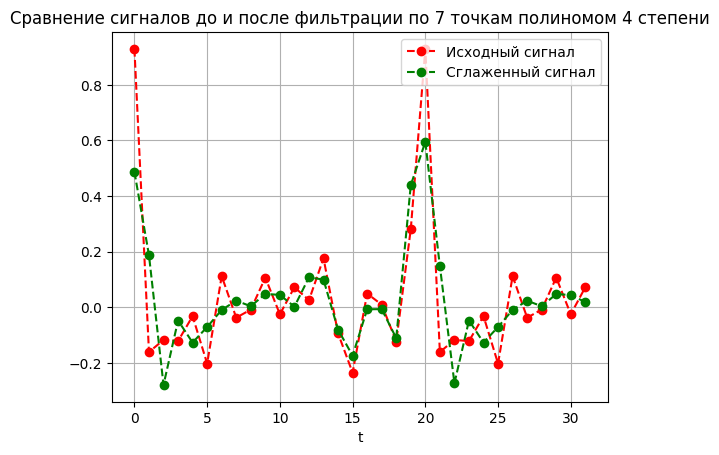

In [ ]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth7_poly4(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 7 точкам полиномом 4 степени')
plt.xlabel('t')
plt.plot()

[]

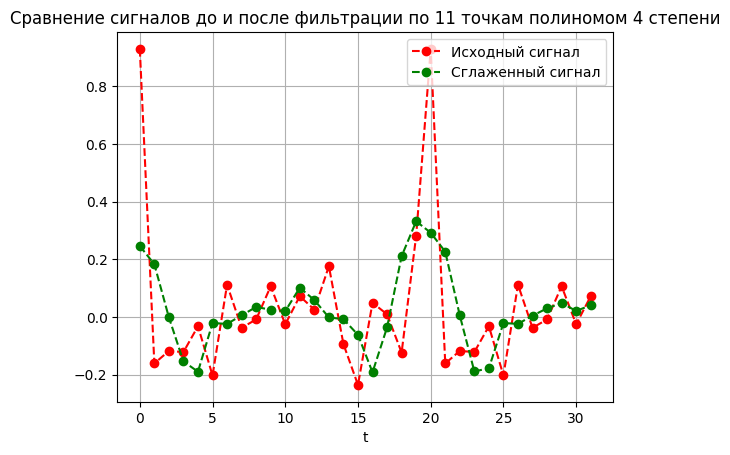

In [ ]:
plt.plot(x_discrete, Y_discrete, linestyle='--', color='red', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, smooth11_poly4(Y_discrete), linestyle='--', color='green', marker='o', label='Сглаженный сигнал')
plt.legend(loc='upper right')
plt.grid()
plt.title('Сравнение сигналов до и после фильтрации по 11 точкам полиномом 4 степени')
plt.xlabel('t')
plt.plot()

### Задание 6

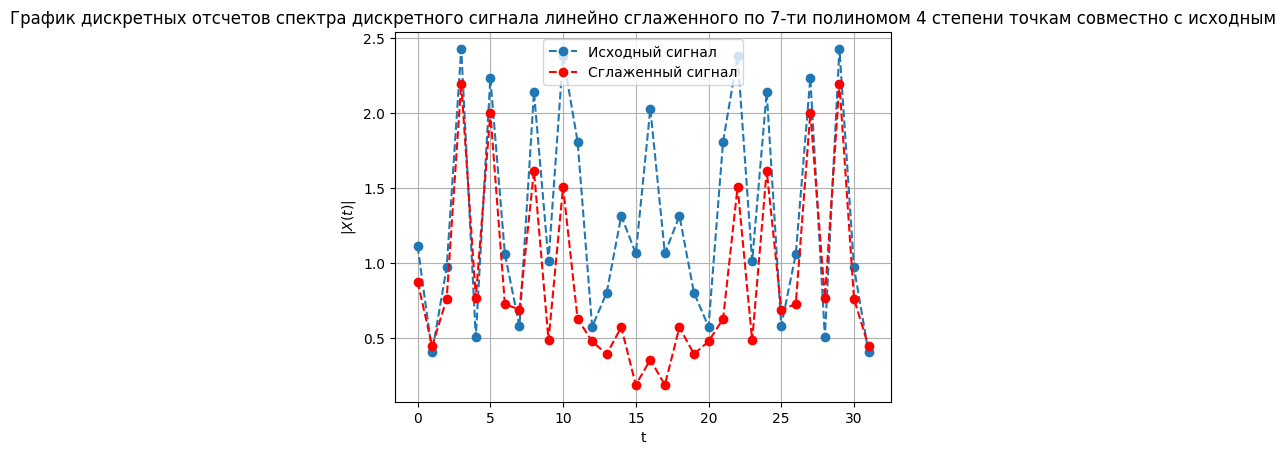

In [ ]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth7_poly4(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 7-ти полиномом 4 степени точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

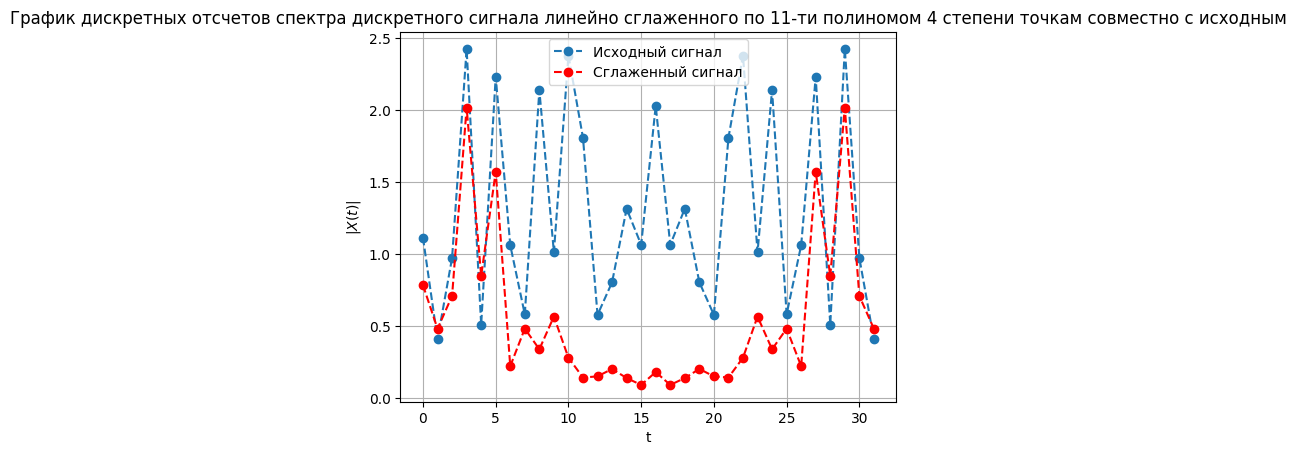

In [ ]:
plt.figure()
plt.plot(x_discrete, np.abs(DFT(Y_discrete)), linestyle='--', marker='o', label='Исходный сигнал')
plt.plot(x_discrete, np.abs(DFT(smooth11_poly4(Y_discrete))), color='red', linestyle='--', marker='o', label='Сглаженный сигнал')
plt.xlabel('t')
plt.ylabel('$|X(t)|$')
plt.title('График дискретных отсчетов спектра дискретного сигнала линейно сглаженного по 11-ти полиномом 4 степени точкам совместно с исходным')
plt.legend(loc='upper center')
plt.grid()
plt.show()

### Задание 7

Спектр симметричен вокруг k = 16, поэтому рассматриваем только k ≤ 16. Сглаживание полиномом 4-й степени даёт более широкую полосу пропускания по сравнению с фильтром 2-й степени: низкочастотные компоненты почти не изменяются. Увеличение окна (7 → 11) сужает полосу: при 7 точках спектр ещё напоминает исходный (после начальных отсчётов), при 11 точках средние и высокие частоты сильно подавлены. Это соответствует ожидаемой частотной характеристике |H(ω)| данных окон.

## Задание 9

В результате проведения лабораторной работы было установлено, что практические результаты спектрального анализа полностью соответствуют теоретическим передаточным функциям. Анализ показал, что полиномиальное сглаживание действует как фильтр низких частот, при этом увеличение количества точек сглаживания приводит к сужению полосы пропускания и усилению подавления высокочастотных составляющих сигнала.

Также было выявлено, что степень используемого полинома напрямую влияет на точность аппроксимации. Сглаживание полиномами более высоких степеней позволяет лучше сохранить форму исходного сигнала, в то время как полиномы низших степеней сильнее его упрощают. Таким образом, применение полинома четвертой степени показало наилучший результат в воспроизведении исходного сигнала.